In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt


In [ ]:
imagePaths = 'Dataset_daun/'
label_list = ['Nangka', 'Pepaya']
data = []
labels = []

In [ ]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'/*.jpg'):
        print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

Dataset_daun/Nangka/010.jpg
Dataset_daun/Nangka/008.jpg
Dataset_daun/Nangka/009.jpg
Dataset_daun/Nangka/005.jpg
Dataset_daun/Nangka/007.jpg
Dataset_daun/Nangka/006.jpg
Dataset_daun/Nangka/004.jpg
Dataset_daun/Nangka/003.jpg
Dataset_daun/Nangka/002.jpg
Dataset_daun/Nangka/001.jpg
Dataset_daun/Nangka/029.jpg
Dataset_daun/Nangka/030.jpg
Dataset_daun/Nangka/027.jpg
Dataset_daun/Nangka/028.jpg
Dataset_daun/Nangka/026.jpg
Dataset_daun/Nangka/025.jpg
Dataset_daun/Nangka/024.jpg
Dataset_daun/Nangka/023.jpg
Dataset_daun/Nangka/022.jpg
Dataset_daun/Nangka/021.jpg
Dataset_daun/Nangka/020.jpg
Dataset_daun/Nangka/019.jpg
Dataset_daun/Nangka/017.jpg
Dataset_daun/Nangka/018.jpg
Dataset_daun/Nangka/015.jpg
Dataset_daun/Nangka/014.jpg
Dataset_daun/Nangka/016.jpg
Dataset_daun/Nangka/012.jpg
Dataset_daun/Nangka/013.jpg
Dataset_daun/Nangka/011.jpg
Dataset_daun/Nangka/048.jpg
Dataset_daun/Nangka/047.jpg
Dataset_daun/Nangka/050.jpg
Dataset_daun/Nangka/049.jpg
Dataset_daun/Nangka/045.jpg
Dataset_daun/Nangka/

In [ ]:
np.array(data).shape

(340, 32, 32, 3)

In [ ]:
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [ ]:
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (272, 32, 32, 3)
Ukuran data test = (68, 32, 32, 3)


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_12 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_13 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_14 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 4,197,377
Trainable params: 4,197,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lr = 0.01
max_epochs = 20
opt_funct = SGD(learning_rate=lr)

In [ ]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

In [ ]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/20
9/9 [==============================] - 1s 61ms/step - loss: 0.9060 - accuracy: 0.4853 - val_loss: 0.5910 - val_accuracy: 0.6176
Epoch 2/20
9/9 [==============================] - 0s 47ms/step - loss: 0.5862 - accuracy: 0.6875 - val_loss: 0.6779 - val_accuracy: 0.5735
Epoch 3/20
9/9 [==============================] - 0s 48ms/step - loss: 0.5461 - accuracy: 0.7096 - val_loss: 0.6386 - val_accuracy: 0.6912
Epoch 4/20
9/9 [==============================] - 0s 46ms/step - loss: 0.4551 - accuracy: 0.7941 - val_loss: 0.6092 - val_accuracy: 0.7353
Epoch 5/20
9/9 [==============================] - 0s 46ms/step - loss: 0.4746 - accuracy: 0.7426 - val_loss: 0.5088 - val_accuracy: 0.7206
Epoch 6/20
9/9 [==============================] - 0s 42ms/step - loss: 0.4541 - accuracy: 0.7904 - val_loss: 0.9153 - val_accuracy: 0.5000
Epoch 7/20
9/9 [==============================] - 0s 41ms/step - loss: 0.5103 - accuracy: 0.7831 - val_loss: 0.4989 - val_accuracy: 0.7206
Epoch 8/20
9/9 [===========

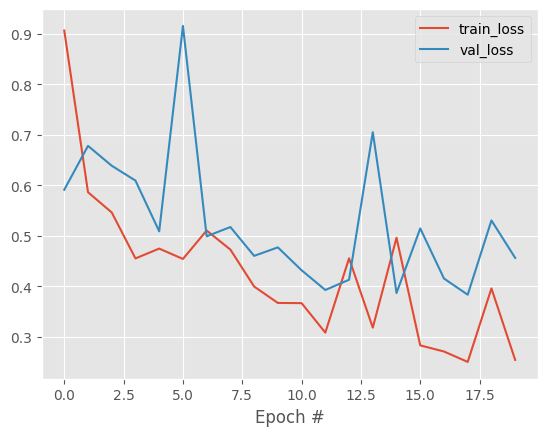

In [ ]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

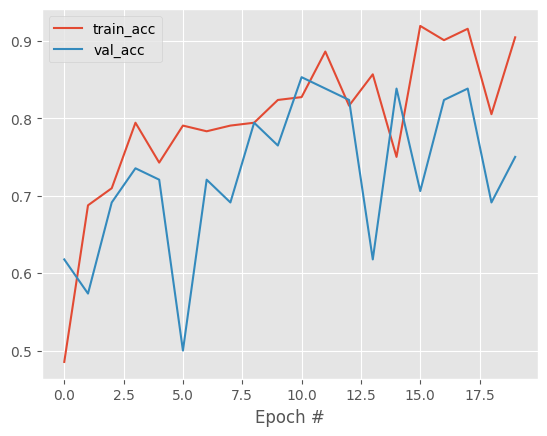

In [ ]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(int)
print(classification_report(y_test, target, target_names=label_list))

3/3 [==============================] - 0s 15ms/step
              precision    recall  f1-score   support

      Nangka       0.69      0.97      0.80        36
      Pepaya       0.94      0.50      0.65        32

    accuracy                           0.75        68
   macro avg       0.81      0.74      0.73        68
weighted avg       0.81      0.75      0.73        68



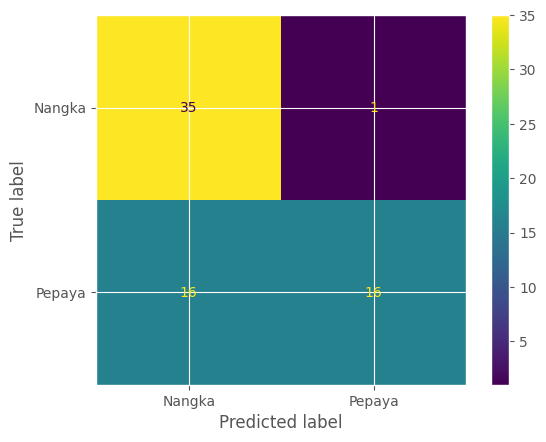

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, target)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = label_list)

cm_display.plot()
plt.show()